/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


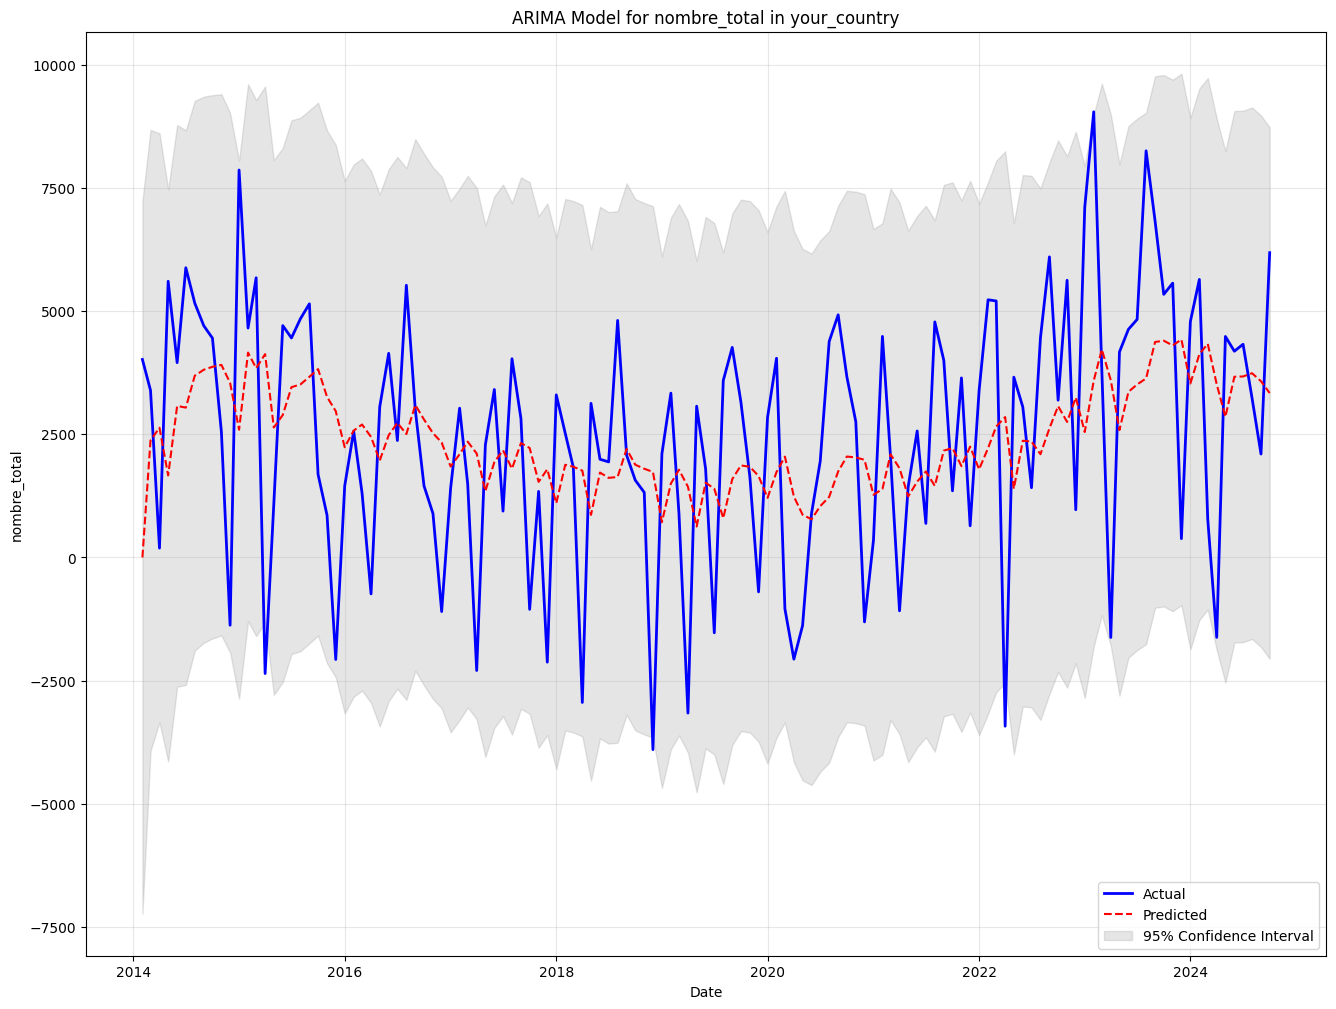

In [1]:
# ARIMA
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("dataset_reformate2.csv") 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df_country = df[df['pays'] == 'Total Europe']
# Set 'date' as index
df_country = df_country.set_index('date')
# Select the relevant column for ARIMA modeling ('nombre_total' in this case)
data = df_country['entree_mensuelle']

# Fit the ARIMA model (you'll need to determine the appropriate p, d, q values)
# Example: ARIMA(p=5, d=1, q=0) 
model = ARIMA(data, order=(1,1,1)) 
model_fit = model.fit()

# Get predictions and confidence intervals
pred = model_fit.get_prediction(start=0, end=len(data) - 1)
pred_ci = pred.conf_int()

# Plot the data and predictions
plt.figure(figsize=(16, 12))
plt.plot(data.index, data, label='Actual', color='blue', linewidth=2)
plt.plot(pred.predicted_mean.index, pred.predicted_mean, label='Predicted', color='red', linestyle='--')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1],
                 color='gray',
                 alpha=.2, 
                 label='95% Confidence Interval')

plt.title(f'ARIMA Model for nombre_total in your_country')
plt.xlabel('Date')
plt.ylabel('nombre_total')
plt.legend()
#plt.ylim(1700000,2100000)
plt.grid(alpha=0.3)
#plt.xlim("2008-03-01",)
plt.show()

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/ImmigrationProject_Python/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning

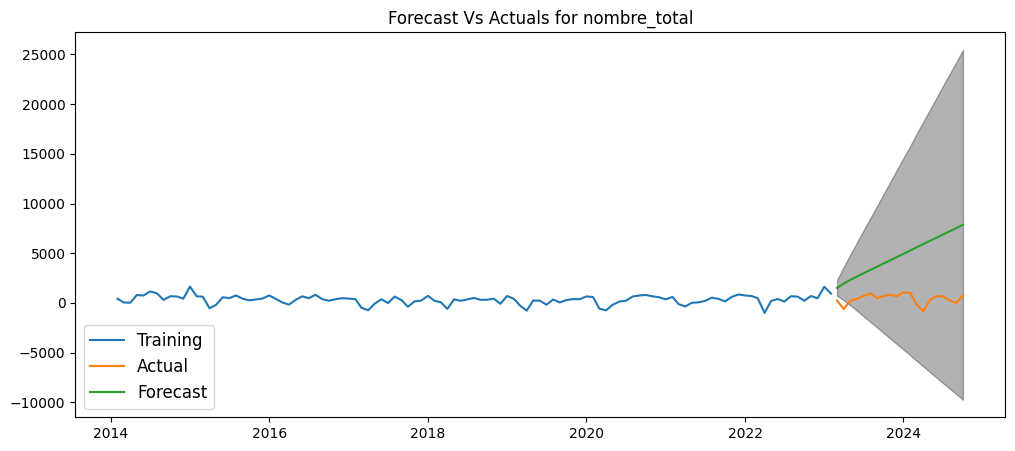

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1948.285, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2002.198, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1946.307, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1959.222, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1948.297, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1950.080, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1928.887, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1948.006, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1927.187, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1929.376, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1928.628, Time=0.01 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.207 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

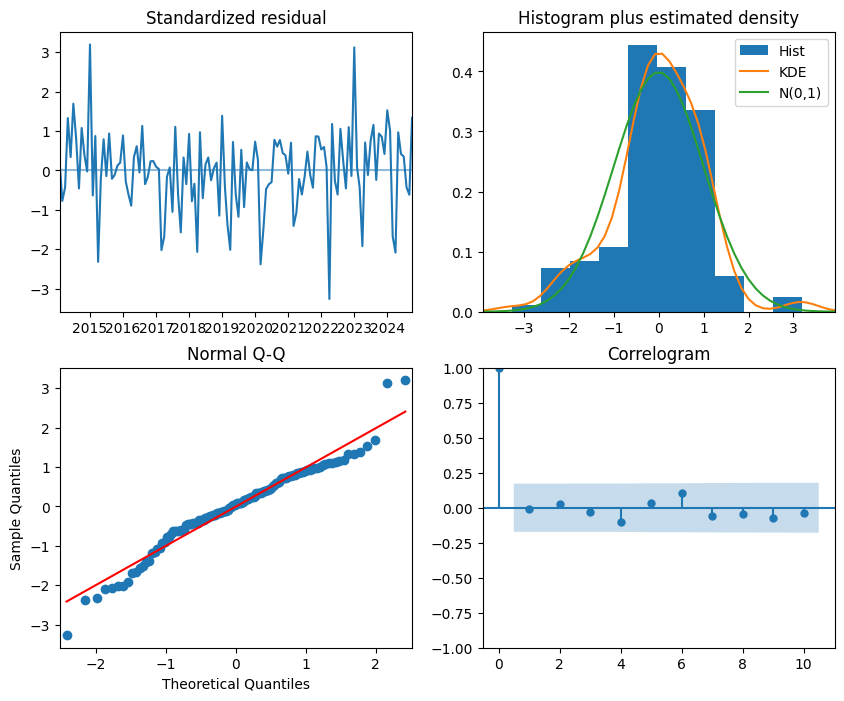

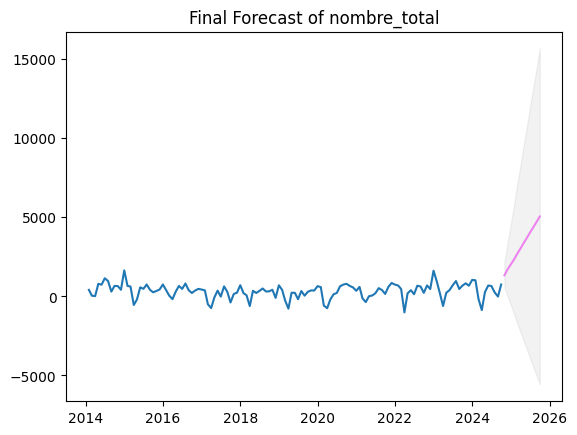

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pmdarima as pm
import numpy as np
 
# Load your dataset
df = pd.read_csv("dataset_reformate.csv")
 
# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
 
# Assuming 'pays' is your country and you want to analyze one country
# (replace 'your_country' with the actual country name)
df_country = df[df['pays'] == 'Italie']
 
# Select the relevant column for ARIMA modeling ('nombre_total' in this case)
data = df_country['entree_mensuelle']
 
# Split data into train and test sets (adjust split point as needed)
train = data[:-20]  # Example: keep the last 96 points for testing
test = data[-20:]
 
# Function to plot forecast
def plot_forecast(test, train, alphaval, titleval):
    model = ARIMA(train, order=(1, 1, 1))  # You might need to adjust the order
    fitted = model.fit()
    
    # Get the forecast
    fc = fitted.forecast(len(test), alpha=alphaval)
 
    # Since fc is now a series, we extract the values
    fc_series = pd.Series(fc.values, index=test.index)  
    
    # Get confidence intervals
    conf = fitted.get_forecast(steps=len(test)).conf_int(alpha=alphaval)
    lower_series = pd.Series(conf.iloc[:, 0], index=test.index)  
    upper_series = pd.Series(conf.iloc[:, 1], index=test.index)  
 
    # Adjust predictions for differencing (cumulative sum)
    fc_series_adjusted = fc_series.cumsum() + train[-1]
    lower_series_adjusted = lower_series.cumsum() + train[-1]
    upper_series_adjusted = upper_series.cumsum() + train[-1]
    
    # Plot
    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(train, label='Training')
    plt.plot(test, label='Actual')
    plt.plot(fc_series_adjusted, label='Forecast')
    plt.fill_between(lower_series_adjusted.index, lower_series_adjusted, upper_series_adjusted,
                     color='k', alpha=.30)
    plt.title(titleval)
    plt.legend(loc='lower left', fontsize=12)
    plt.show()
 
# Plot the forecast
plot_forecast(test, train, 0.05, 'Forecast Vs Actuals for nombre_total')
 
 
# Auto ARIMA
model = pm.auto_arima(data,
                      start_p=1,
                      start_q=1,
                      test='adf',
                      max_p=2,
                      max_q=3,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
 
print(model.summary())
 
# Plot diagnostics
model.plot_diagnostics(figsize=(10, 8))
plt.show()
 
# Final forecast
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
 
# Generate correct forecast dates
forecast_dates = pd.date_range(start=data.index[-1], periods=n_periods+1, freq='MS')[1:]
 
fc_series = pd.Series(fc, index=forecast_dates)
lower_series = pd.Series(confint[:, 0], index=forecast_dates)
upper_series = pd.Series(confint[:, 1], index=forecast_dates)
 
# Adjust predictions for differencing (cumulative sum)
fc_series_adjusted = fc_series.cumsum() + data.iloc[-1]  # Use .iloc[-1] for consistency
lower_series_adjusted = lower_series.cumsum() + data.iloc[-1]
upper_series_adjusted = upper_series.cumsum() + data.iloc[-1]
 
plt.plot(data)
plt.plot(fc_series_adjusted, color='violet')
plt.fill_between(lower_series_adjusted.index,
                 lower_series_adjusted,
                 upper_series_adjusted,
                 color='k',
                 alpha=.05)
plt.title("Final Forecast of nombre_total")
plt.show()